In [6]:
import jax
import jax.numpy as jnp

# 定义一个使用 a.at[].set 的函数
def update_array(a, index, value):
    return a.at[index].set(value)

# 编译该函数
update_array_jit = jax.jit(update_array)

# 示例数组
a = jnp.array([1, 2, 3, 4, 5])

# 使用未编译的函数进行修改
new_a = update_array(a, (..., 0), 10)
print("未编译的函数结果:", new_a)

# 使用编译后的函数进行修改
new_a_jit = update_array_jit(a, 2, 10)
print("编译后的函数结果:", new_a_jit)



未编译的函数结果: [10  2  3  4  5]
编译后的函数结果: [ 1  2 10  4  5]


[[ 2 12  7 13 14  6  3  8  9  0]
 [ 1  4 11  5 15 10  0  9  8  3]]
[[0.         0.        ]
 [0.         1.        ]
 [1.         0.        ]
 [1.         1.        ]
 [0.         0.66666667]
 [0.         0.33333333]
 [0.33333333 0.        ]
 [0.66666667 0.        ]
 [0.66666667 0.66666667]
 [0.33333333 0.33333333]
 [0.66666667 1.        ]
 [0.33333333 1.        ]
 [1.         0.33333333]
 [1.         0.66666667]
 [0.66666667 0.33333333]
 [0.33333333 0.66666667]]


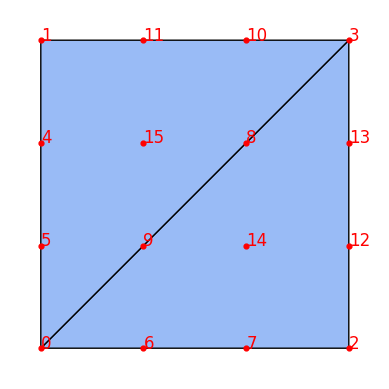

In [5]:
import matplotlib.pyplot as plt
from fealpy.mesh import TriangleMesh
from fealpy.functionspace import LagrangeFESpace

mesh = TriangleMesh.from_box(box=[0, 1, 0, 1], nx=1, ny=1)
space = LagrangeFESpace(mesh, p = 3)
ips = space.interpolation_points()
cell2dof = space.cell_to_dof()
print(cell2dof)
print(ips)
fig = plt.figure()
axes = fig.gca()
mesh.add_plot(axes)
mesh.find_node(axes, node=ips, showindex=True)
#mesh.find_cell(axes, showindex=True)
#mesh.find_edge(axes, showindex=True)